## Perform EDA on student-mat


### Datasets

student-mat


Import the libraries 

In [1]:
import pandas as pd
import numpy as np

Import the csv file for the "student-mat" dataset and make a copy of the dataframe

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

data  = pd.read_csv('/content/drive/MyDrive/KJ Training Program/KJ-Exam/student-mat.csv', sep=','  , engine='python')
df = data.copy()
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


let's get some insight of data by looking at the shape and few rows.

In [4]:
df.shape

(395, 33)

print the data type of all columns

In [5]:
df.dtypes


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

show dataset summary in terms of count, unique, top mean etc

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:

df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
df.value_counts().sum()

395

In [9]:
df['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [10]:
df[["sex", "age"]].groupby("sex").mean()

,age
sex,
F,16.730769
M,16.657754


show dataset summary in terms of count, unique, top mean etc for all columns

check how much data is missing


In [11]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Lets add a new column 'TermResult' which will be accumulative result of First Term Result (G1), Second Term Result (G2) and Final Term Result (G3)

Now add a new column to the dataframe with name "TermResult" which will be sum of columns G1, G2 and G3

In [12]:
df['TermResult'] =df['G1']+df['G2']+df['G3']

show top 15 rows

In [13]:
df.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,TermResult
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,16
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,25
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,44
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,26
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15,45
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11,35
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6,17
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19,53
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15,44


now plot the distrubution of "TermResult" column and suggest the range of marks of most students

In [14]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'TermResult'],
      dtype='object')

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Term Result')

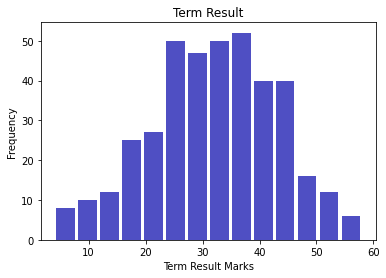

In [16]:
plt.hist(x=df['TermResult'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
#plt.grid(axis=df['TermResult'], alpha=0.75)
plt.xlabel('Term Result Marks')
plt.ylabel('Frequency')
plt.title('Term Result')


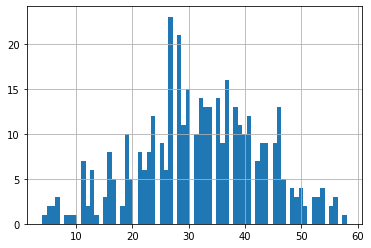

In [17]:
df['TermResult'].hist(bins=70)

Add another column "TermResultPerct" and convert the TermResult colum to percentage for better representation

In [18]:
df['TermResultPerct'] = (df['TermResult'] / 60) * 60

In [19]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,TermResult,TermResultPerct
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,17,17.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,16,16.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,25,25.0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,44,44.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,26,26.0


describe the distribution of value of newly created percentage column

In [20]:
df['TermResultPerct'].describe()

count    395.000000
mean      32.037975
std       11.090357
min        4.000000
25%       25.000000
50%       32.000000
75%       40.000000
max       58.000000
Name: TermResultPerct, dtype: float64

plot the relationship between study time and result percentage.

In [21]:
df.studytime.unique()

array([2, 3, 1, 4])

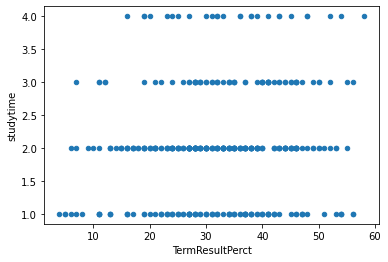

In [22]:
df.plot(kind='scatter',x='TermResultPerct',y='studytime')
plt.show()

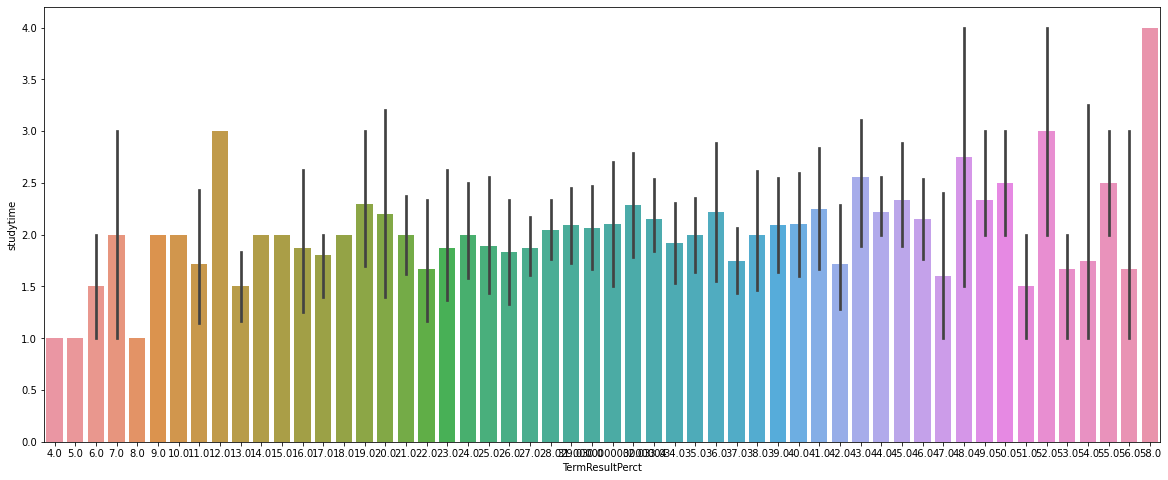

In [23]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x =df["TermResultPerct"], y = df["studytime"], ax=ax, data=df)

Plot the relation between previous failures and result percentage

In [24]:
df.failures.unique()

array([0, 3, 2, 1])

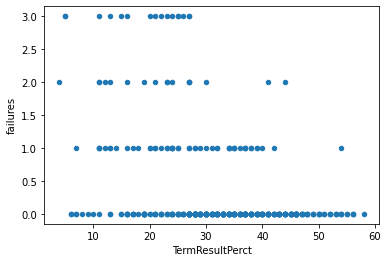

In [25]:
df.plot(kind='scatter',x='TermResultPerct',y='failures')
plt.show()

plot the distribution of percentage of students.

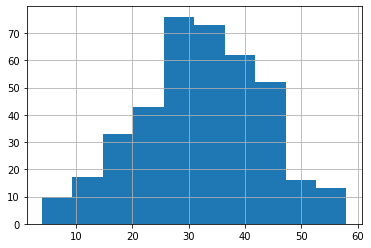

In [26]:
df['TermResultPerct'].hist()

(array([ 8., 10., 12., 25., 27., 50., 47., 50., 52., 40., 40., 16., 12.,
         6.]),
 array([ 4.        ,  7.85714286, 11.71428571, 15.57142857, 19.42857143,
        23.28571429, 27.14285714, 31.        , 34.85714286, 38.71428571,
        42.57142857, 46.42857143, 50.28571429, 54.14285714, 58.        ]),
 <a list of 14 Patch objects>)

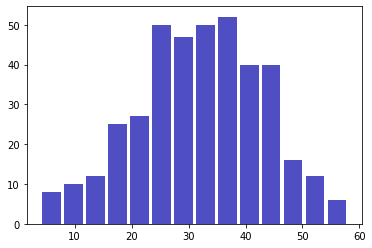

In [27]:
plt.hist(x=df['TermResultPerct'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

add another column to the data which will show the pass status of the student Assuming 70% and above as passing percetage

In [28]:
df["perc_from_hund"] = (df['TermResultPerct']/60)*100
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,TermResult,TermResultPerct,perc_from_hund
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,17,17.0,28.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,16,16.0,26.666667
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,25,25.0,41.666667
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,44,44.0,73.333333
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,26,26.0,43.333333


In [29]:
df["PassStatus"] = df['perc_from_hund'].apply(lambda x : 'Fail' if x <= 69 else 'Pass')

In [30]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,TermResult,TermResultPerct,perc_from_hund,PassStatus
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,17,17.0,28.333333,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,16,16.0,26.666667,Fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,25,25.0,41.666667,Fail
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,44,44.0,73.333333,Pass
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,26,26.0,43.333333,Fail


now plot how many males and how many females passed the course

In [31]:
df['PassStatus'].value_counts()

Fail    314
Pass     81
Name: PassStatus, dtype: int64

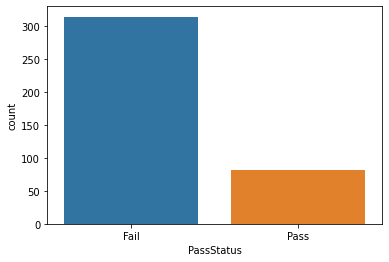

In [32]:
sns.countplot(x=df['PassStatus'])

Check mother's education has any impact on passing a course?

In [33]:
df.Medu.unique()

array([4, 1, 3, 2, 0])

In [34]:
#df[['PassStatus',"Medu"]].groupby('PassStatus').mean()
df['PassStatus'].value_counts()

Fail    314
Pass     81
Name: PassStatus, dtype: int64

In [35]:
print(pd.crosstab(df["Medu"],df.PassStatus))

PassStatus  Fail  Pass
Medu                  
0              1     2
1             55     4
2             90    13
3             80    19
4             88    43


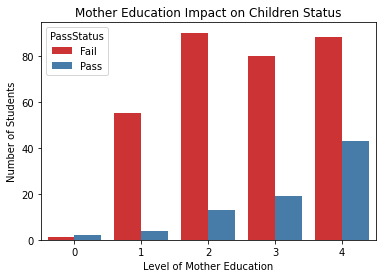

In [36]:
ax = sns.countplot(x = 'Medu', hue = 'PassStatus', palette = 'Set1', data = df)
ax.set(title = 'Mother Education Impact on Children Status', 
       xlabel = 'Level of Mother Education', ylabel = 'Number of Students')
plt.show()

Check father's education has any impact on passing a course?

In [37]:
df['PassStatus'].value_counts()

Fail    314
Pass     81
Name: PassStatus, dtype: int64

In [38]:
print(pd.crosstab(df["Fedu"],df.PassStatus))

PassStatus  Fail  Pass
Fedu                  
0              1     1
1             73     9
2             93    22
3             80    20
4             67    29


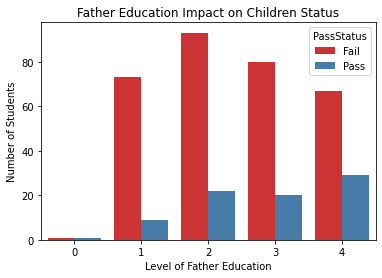

In [39]:
ax = sns.countplot(x = 'Fedu', hue = 'PassStatus', palette = 'Set1', data = df)
ax.set(title = 'Father Education Impact on Children Status', 
       xlabel = 'Level of Father Education', ylabel = 'Number of Students')
plt.show()

Mother's job vs passing status

In [62]:
print(pd.crosstab(df['Mjob'], df['PassStatus']))

PassStatus  Fail  Pass
Mjob                  
at_home       52     7
health        20    14
other        123    18
services      78    25
teacher       41    17


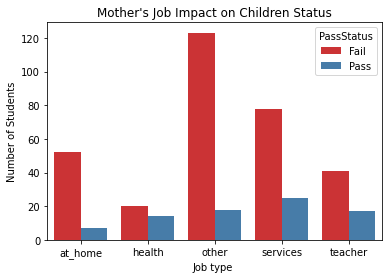

In [63]:
ax = sns.countplot(x = 'Mjob', hue = 'PassStatus', palette = 'Set1', data = df)
ax.set(title = "Mother's Job Impact on Children Status", 
       xlabel = 'Job type ', ylabel = 'Number of Students')
plt.show()

Father's job vs passing status

In [43]:
print(pd.crosstab(df.Fjob, df.PassStatus))

PassStatus  Fail  Pass
Fjob                  
at_home       15     5
health        13     5
other        182    35
services      89    22
teacher       15    14


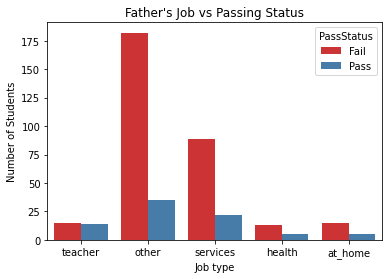

In [64]:

ax = sns.countplot(x = 'Fjob', hue = 'PassStatus', palette = 'Set1', data = df)
ax.set(title = "Father's Job vs Passing Status", 
       xlabel = 'Job type', ylabel = 'Number of Students')
plt.show()

Does health impacts the grades?

In [45]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'TermResult',
       'TermResultPerct', 'perc_from_hund', 'PassStatus'],
      dtype='object')

In [46]:
print(pd.crosstab(df.health, df.PassStatus))

PassStatus  Fail  Pass
health                
1             31    16
2             33    12
3             78    13
4             54    12
5            118    28


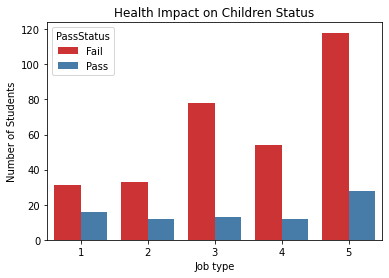

In [47]:
ax = sns.countplot(x = 'health', hue = 'PassStatus', palette = 'Set1', data = df)
ax.set(title = "Health Impact on Children Status", 
       xlabel = 'Job type', ylabel = 'Number of Students')
plt.show()

Does internet usage impacts the grades?

In [48]:
print(pd.crosstab(df.internet, df['PassStatus']))

PassStatus  Fail  Pass
internet              
no            59     7
yes          255    74


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


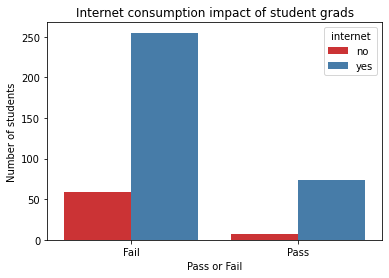

In [65]:
axn_status = sns.countplot(df['PassStatus'], hue='internet', data=df, palette='Set1')
axn_status.set(title="Internet consumption impact of student grads", xlabel="Pass or Fail", ylabel="Number of students")
plt.show()

Does going out impacts the grades

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


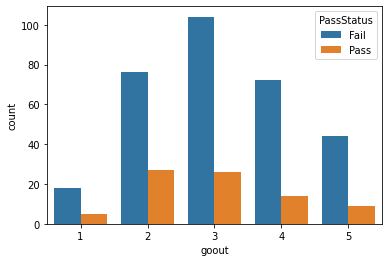

In [50]:
sns.countplot(df['goout'], hue='PassStatus', data=df)

Does daily alchohal intake impacts the grades

In [51]:
df.Dalc.unique()

array([1, 2, 5, 3, 4])

In [52]:
print(pd.crosstab(df.Dalc, df.PassStatus))

PassStatus  Fail  Pass
Dalc                  
1            208    68
2             65    10
3             23     3
4              9     0
5              9     0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


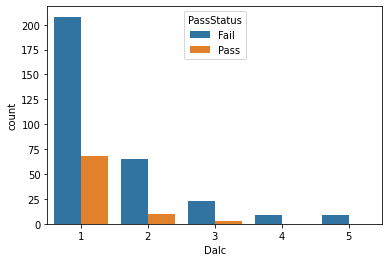

In [53]:
sns.countplot(df.Dalc, hue = 'PassStatus', data = df)

Does weekend alchohal intake impacts the grades?

In [54]:
df.Walc.unique()

array([1, 3, 2, 4, 5])

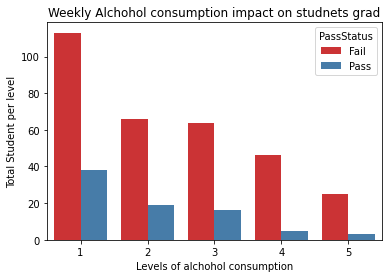

In [55]:
ax = sns.countplot(x = 'Walc', hue = 'PassStatus', palette = 'Set1', data = df)
ax.set(title = "Weekly Alchohol consumption impact on studnets grad", 
       xlabel = 'Levels of alchohol consumption', ylabel = 'Total Student per level')
plt.show()

Does travel time impacts the grade?

In [56]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'TermResult',
       'TermResultPerct', 'perc_from_hund', 'PassStatus'],
      dtype='object')

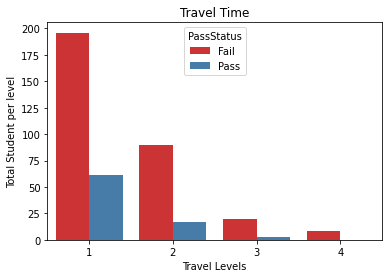

In [57]:
ax = sns.countplot(x = 'traveltime', hue = 'PassStatus', palette = 'Set1', data = df)
ax.set(title = "Travel Time", 
       xlabel = 'Travel Levels', ylabel = 'Total Student per level')
plt.show()

Completed EDA Section by analyzing and visualizing most the vital relational features.